In [8]:
import os
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns

In [9]:
# Пути к папке с изображениями
dataset_dir = 'DataSet_b_30'
train_dir = os.path.join(dataset_dir, 'train')
validation_dir = os.path.join(dataset_dir, 'validation')
test_dir = os.path.join(dataset_dir, 'test')

# Создание папок для тренировочной, валидационной и тестовой выборки
os.makedirs(train_dir, exist_ok=True)
os.makedirs(validation_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Классы для разделения данных
classes = ['class1', 'class2', 'class3', 'class4', 'class5', 'class6', 'class7', 'class8']


In [10]:
# Функция для разделения изображений на тренировочную, валидационную и тестовую выборки
def split_data(class_name, validation_split=0.2, test_split=0.1):
    class_dir = os.path.join(dataset_dir, class_name)
    
    # Проверяем, существует ли директория класса
    if not os.path.exists(class_dir):
        print(f"Ошибка: директория {class_dir} не найдена.")
        return
    
    images = os.listdir(class_dir)
    
    if not images:  # Проверка на наличие изображений
        print(f"Ошибка: директория {class_dir} пуста.")
        return
    
    # Разделяем изображения: сначала выделяем тестовые данные, затем тренировочные и валидационные
    train_images, test_images = train_test_split(images, test_size=test_split, random_state=42)
    train_images, val_images = train_test_split(train_images, test_size=validation_split, random_state=42)
    
    # Создание директорий для каждого класса в папках train, validation и test
    train_class_dir = os.path.join(train_dir, class_name)
    validation_class_dir = os.path.join(validation_dir, class_name)
    test_class_dir = os.path.join(test_dir, class_name)
    
    os.makedirs(train_class_dir, exist_ok=True)
    os.makedirs(validation_class_dir, exist_ok=True)
    os.makedirs(test_class_dir, exist_ok=True)
    
    # Копируем изображения в соответствующие папки
    for img in train_images:
        src_path = os.path.join(class_dir, img)
        dest_path = os.path.join(train_class_dir, img)
        shutil.copy(src_path, dest_path)
    
    for img in val_images:
        src_path = os.path.join(class_dir, img)
        dest_path = os.path.join(validation_class_dir, img)
        shutil.copy(src_path, dest_path)
    
    for img in test_images:
        src_path = os.path.join(class_dir, img)
        dest_path = os.path.join(test_class_dir, img)
        shutil.copy(src_path, dest_path)

# Разделяем изображения для каждого класса
for cls in classes:
    split_data(cls)


In [11]:
# Создание генераторов для загрузки данных
batch_size = 32
image_size = 128

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Данные должны быть в том же порядке для корректного отображения метрик
)

# Проверка, что генераторы созданы успешно
print(f"Training samples: {train_generator.samples}, Validation samples: {validation_generator.samples}, Test samples: {test_generator.samples}")

# # Создание модели
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_size, image_size, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(classes), activation='softmax')  # Количество нейронов должно соответствовать числу классов
])

# Компиляция модели
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Found 10480 images belonging to 8 classes.
Found 2624 images belonging to 8 classes.
Found 1456 images belonging to 8 classes.
Training samples: 10480, Validation samples: 2624, Test samples: 1456


c:\Users\dmitr\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# Обучение модели
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10
)

# Сохранение модели
model.save('zernike_model_b_15_v1.0.h5')

Epoch 1/10


c:\Users\dmitr\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


328/328 ━━━━━━━━━━━━━━━━━━━━ 131s 391ms/step - accuracy: 0.3369 - loss: 1.9621 - val_accuracy: 0.8857 - val_loss: 0.3368
Epoch 2/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 60s 181ms/step - accuracy: 0.9085 - loss: 0.2990 - val_accuracy: 0.9165 - val_loss: 0.2445
Epoch 3/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 59s 178ms/step - accuracy: 0.9343 - loss: 0.2124 - val_accuracy: 0.9451 - val_loss: 0.1657
Epoch 4/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 60s 181ms/step - accuracy: 0.9608 - loss: 0.1267 - val_accuracy: 0.9505 - val_loss: 0.1513
Epoch 5/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 60s 182ms/step - accuracy: 0.9620 - loss: 0.1166 - val_accuracy: 0.9676 - val_loss: 0.1122
Epoch 6/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 59s 180ms/step - accuracy: 0.9750 - loss: 0.0787 - val_accuracy: 0.9718 - val_loss: 0.0854
Epoch 7/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 61s 184ms/step - accuracy: 0.9774 - loss: 0.0637 - val_accuracy: 0.9585 - val_loss: 0.1309
Epoch 8/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 59s 180ms/step - accuracy: 0.9789 - loss: 0.0655 - va

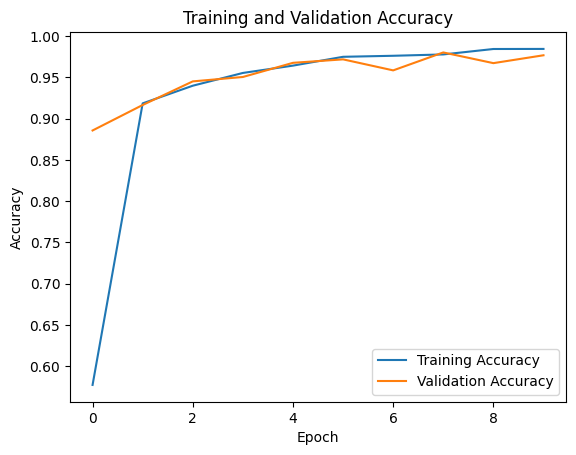

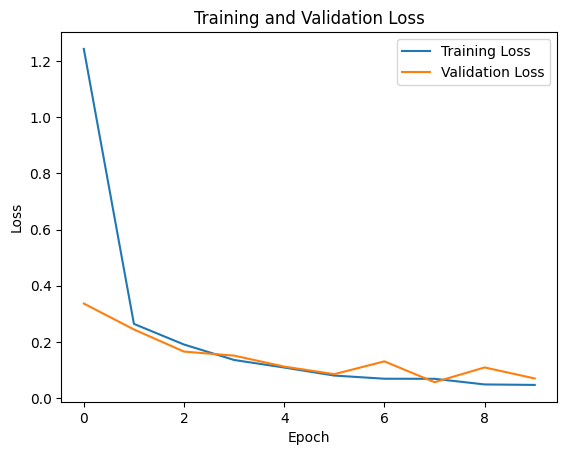

In [13]:
# Визуализация обучения
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Визуализация обучения
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

46/46 ━━━━━━━━━━━━━━━━━━━━ 10s 226ms/step - accuracy: 0.9707 - loss: 0.0793
Test Accuracy: 0.973901093006134
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step
Classification Report:
              precision    recall  f1-score   support

      class1       0.98      0.99      0.99       182
      class2       0.97      0.97      0.97       182
      class3       0.99      0.95      0.97       182
      class4       0.99      0.98      0.98       182
      class5       1.00      0.99      0.99       182
      class6       0.91      0.99      0.95       182
      class7       1.00      0.95      0.97       182
      class8       0.95      0.98      0.96       182

    accuracy                           0.97      1456
   macro avg       0.98      0.97      0.97      1456
weighted avg       0.98      0.97      0.97      1456



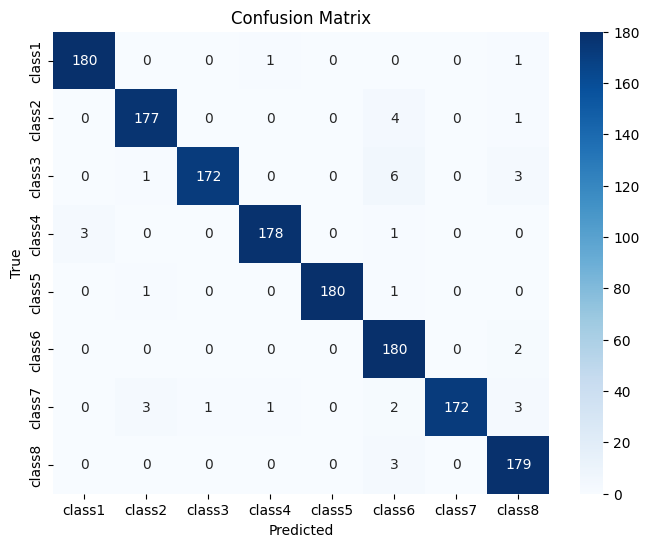

In [14]:
# Оценка на тестовой выборке
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy}")

# Предсказания на тестовых данных
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)  # Преобразуем one-hot encoding в метки классов
y_true = test_generator.classes  # Истинные метки классов

# Отчёт по классификации
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=classes))

# Матрица ошибок
cm = confusion_matrix(y_true, y_pred_classes)

# Визуализация матрицы ошибок
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()